In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score, silhouette_samples

In [2]:
def plot_data(x, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, s=50)
    plt.xlabel('V1')
    plt.ylabel('V2')
    plt.show()

In [3]:
def plot_clusters(data, num_clusters, title):
    colors = list(mcolors.TABLEAU_COLORS.keys())

    for k in range(num_clusters):
        rows = np.where(data[:, 2] == k)
        
        plt.scatter(data[rows][:, 0], data[rows][:, 1], label='Cluster {}'.format(k+1), color=colors[k])
    plt.legend()
    plt.xlabel('V1')
    plt.ylabel('V2')
    plt.title(title)
    plt.show()

In [33]:
def plot_silhouette_values(data, num_clusters, labels):
    sample_silhouette_values = silhouette_samples(data, labels)
    y_lower = 10
    for i in range(num_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / num_clusters)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper), 
            0, 
            ith_cluster_silhouette_values, 
            facecolor=color, 
            edgecolor=color, 
            alpha=0.7
        )
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    plt.title(f"Num Clusters: {num_clusters}")
    plt.show()

## Define K-means Clustering

In [47]:
def evaluate_kmeans_clustering(data, num_clusters, metric='silhouette'):
    random_states = [10, 20, 30, 40, 50]
    kmeans_best_params = {"k": 0, "score": 0, "labels": None}
    score_history = {}

    if metric == 'davies_bouldin':
        kmeans_best_params['score'] = 1000
    if metric == 'silhouette':
        kmeans_best_params['score'] = -1000
    
    for k in num_clusters:
        scores = list()

        for rs in random_states:
            kmeans = KMeans(n_clusters=k, random_state=rs)
            y_pred = kmeans.fit_predict(data)

            if metric == 'davies_bouldin':
                score = davies_bouldin_score(data, y_pred)
                
            if metric == 'silhouette':
                score = silhouette_score(data, y_pred)
            scores.append(score)

        avg_score = np.mean(scores)
        score_history[k] = avg_score

        if metric == 'davies_bouldin':
            print(f"K: {k}, Score: {avg_score:.2f}")
            if avg_score < kmeans_best_params["score"]:
                kmeans_best_params["k"] = k
                kmeans_best_params["score"] = avg_score
                kmeans_best_params["labels"] = y_pred
        if metric == 'silhouette':
            plot_silhouette_values(data, k, y_pred)
            if avg_score > kmeans_best_params["score"]:
                kmeans_best_params["k"] = k
                kmeans_best_params["score"] = avg_score
                kmeans_best_params["labels"] = y_pred
    
    # Plot the score history
    plt.plot(list(score_history.keys()), list(score_history.values()))
    plt.xlabel('Num Clusters')
    plt.ylabel('Score')
    plt.show()

    return kmeans_best_params, score_history

## First Dataset

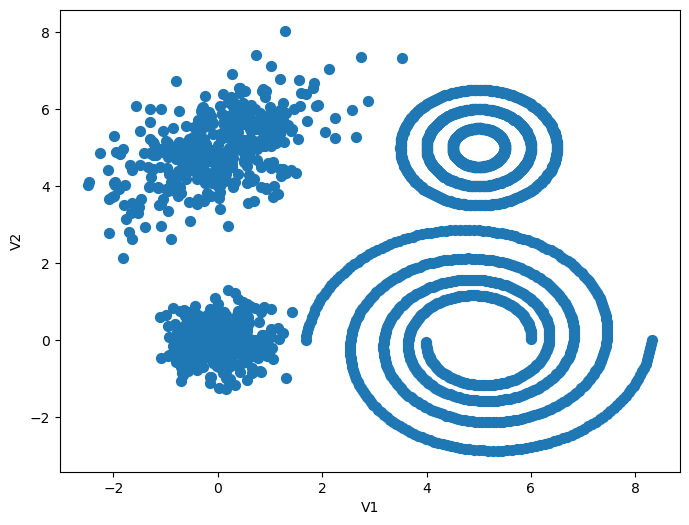

In [48]:
data_one = np.genfromtxt('donclassif.csv', delimiter=';')
data_one = np.delete(data_one, 0, 0)
plot_data(data_one[:, 0], data_one[:, 1])

### Find Number of Clusters using Silhouette Metric

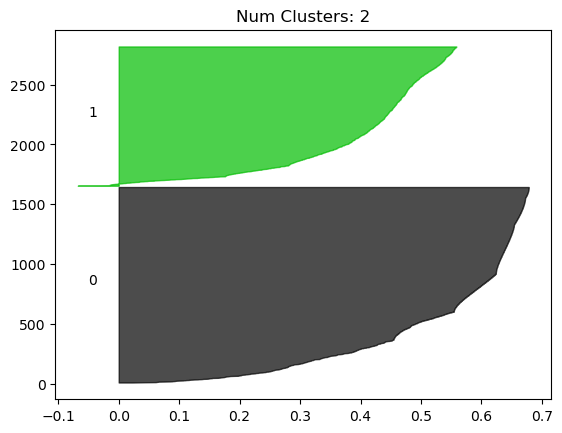

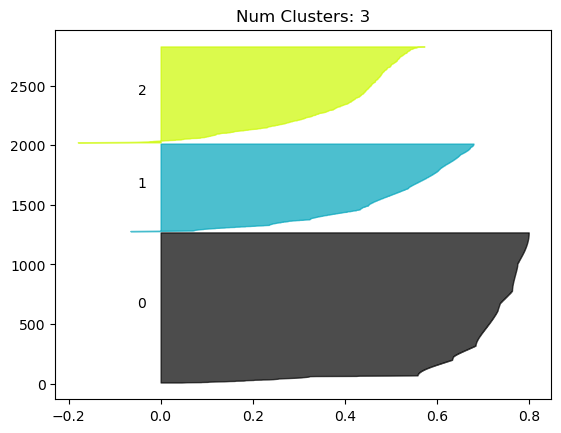

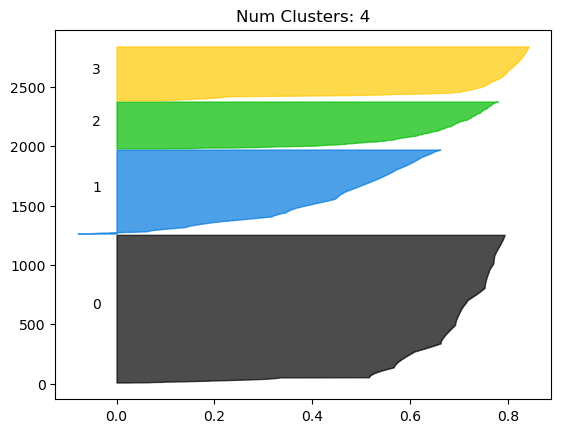

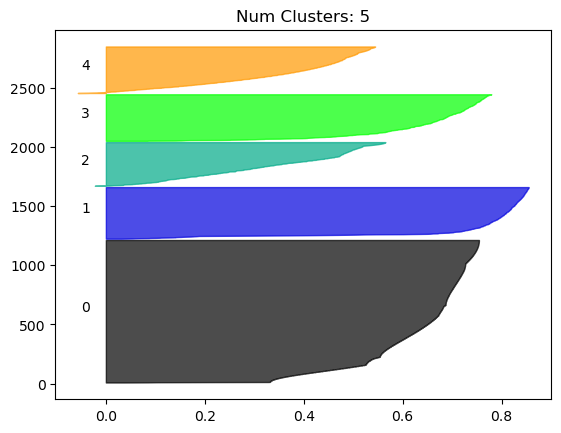

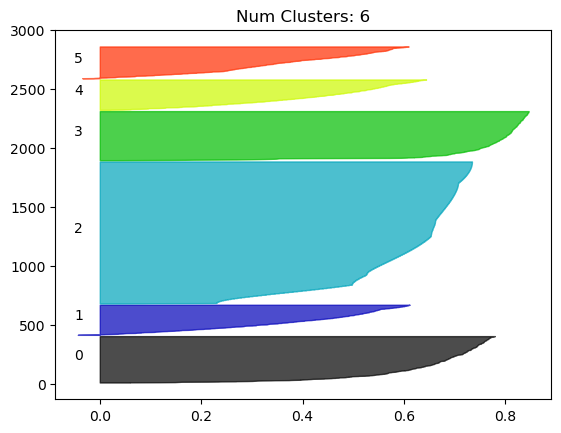

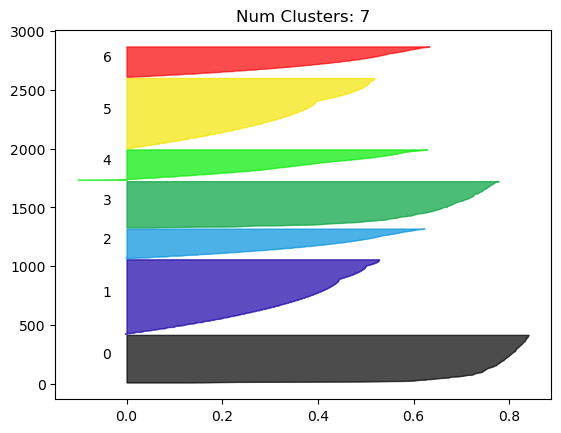

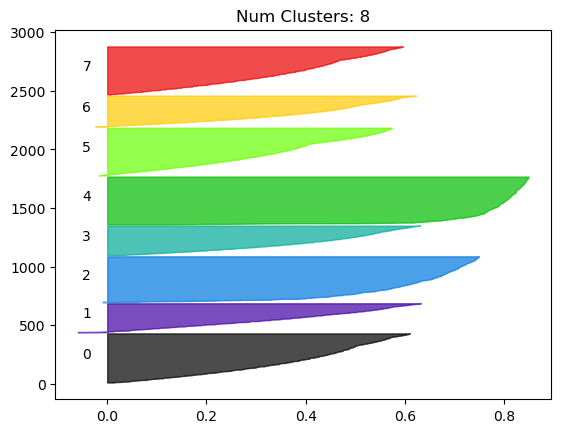

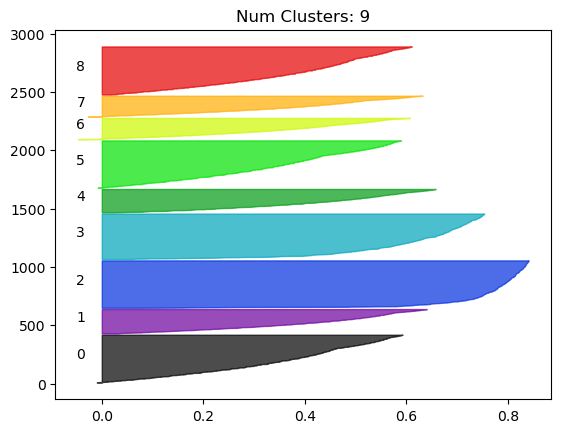

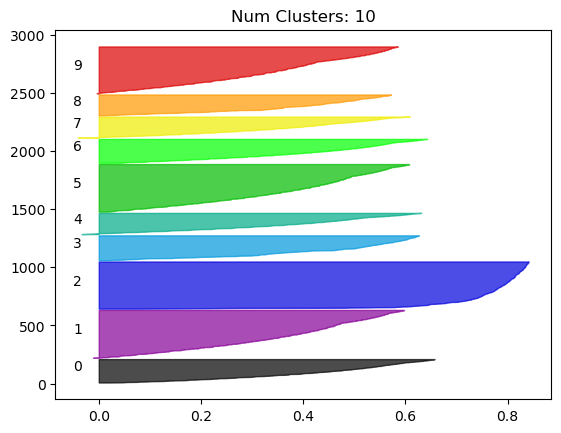

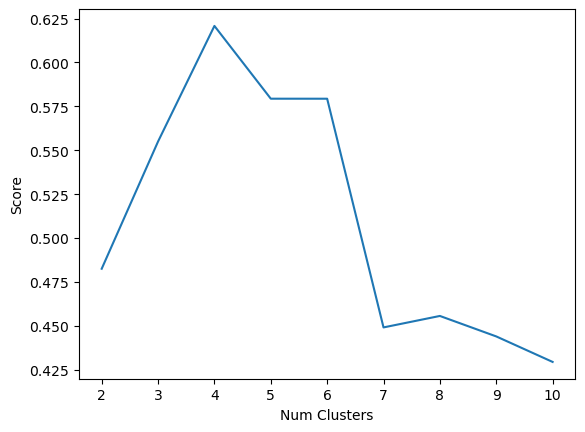

{'k': 4,
 'score': 0.6208198454239984,
 'labels': array([1, 1, 1, ..., 2, 2, 2], dtype=int32)}

In [49]:
num_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
kmeans_best_params, kmean_history = evaluate_kmeans_clustering(data_one, num_clusters=num_clusters, metric='silhouette')
kmeans_best_params

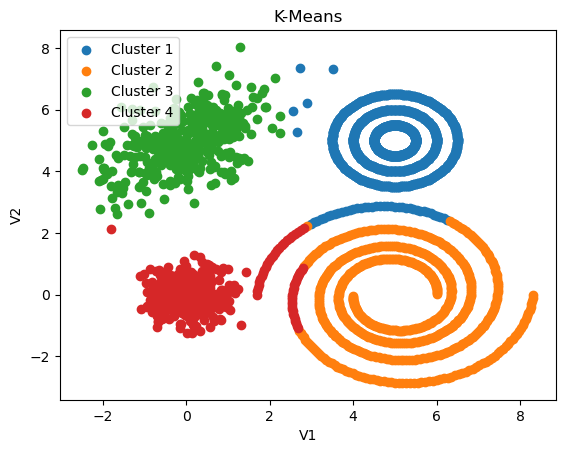

In [50]:
result_data_one = np.concatenate((data_one, kmeans_best_params['labels'].reshape(-1, 1)), axis=1)
plot_clusters(result_data_one, kmeans_best_params['k'], 'K-Means')

### Find Number of Clusters using Daives Bouldin metric

K: 2, Score: 0.94
K: 3, Score: 0.74
K: 4, Score: 0.52
K: 5, Score: 0.74
K: 6, Score: 0.65
K: 7, Score: 0.82
K: 8, Score: 0.76
K: 9, Score: 0.78
K: 10, Score: 0.80


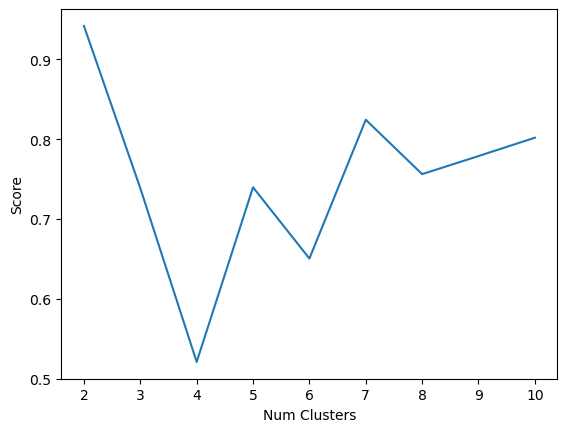

{'k': 4,
 'score': 0.5209934097368267,
 'labels': array([1, 1, 1, ..., 2, 2, 2], dtype=int32)}

In [51]:
num_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
kmeans_best_params, kmean_history = evaluate_kmeans_clustering(data_one, num_clusters=num_clusters, metric='davies_bouldin')
kmeans_best_params

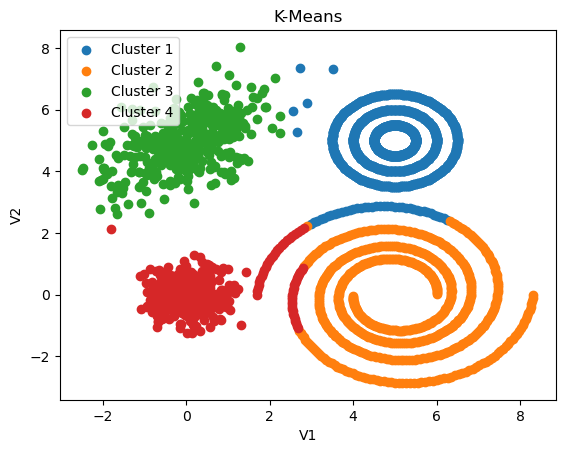

In [52]:
result_data_one = np.concatenate((data_one, kmeans_best_params['labels'].reshape(-1, 1)), axis=1)
plot_clusters(result_data_one, kmeans_best_params['k'], 'K-Means')

## Seconda Dataset

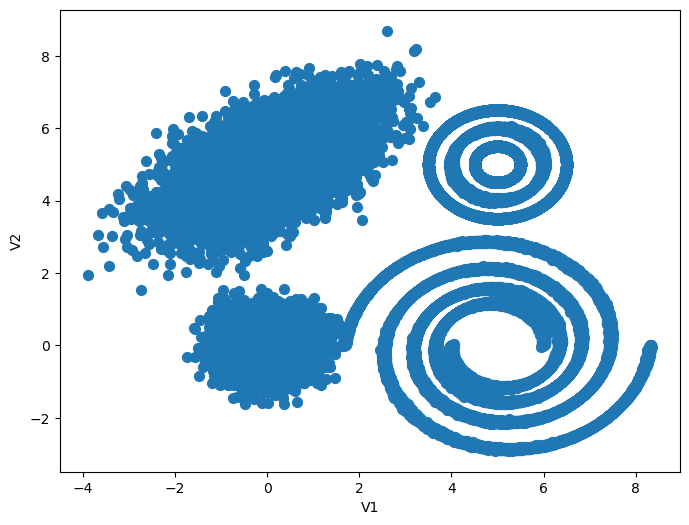

In [5]:
data_two = np.genfromtxt('donclassif2.csv', delimiter=';')
data_two = np.delete(data_two, 0, 0)
plot_data(data_two[:, 0], data_two[:, 1])

### Find Number of Clusters using Silhouette metric

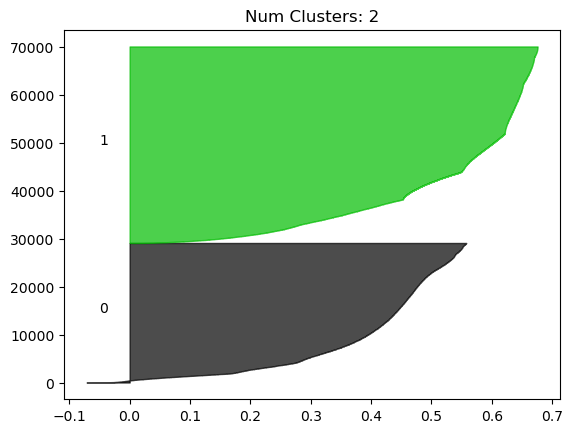

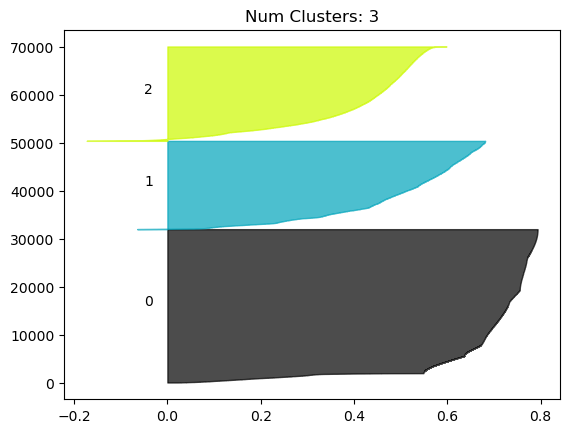

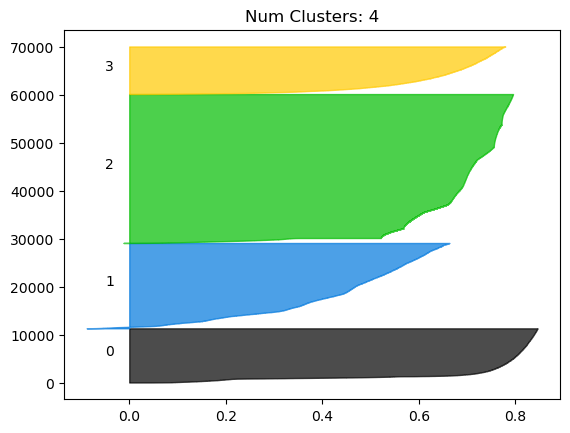

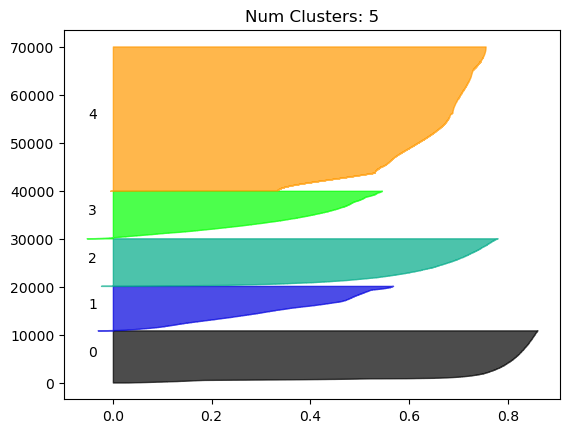

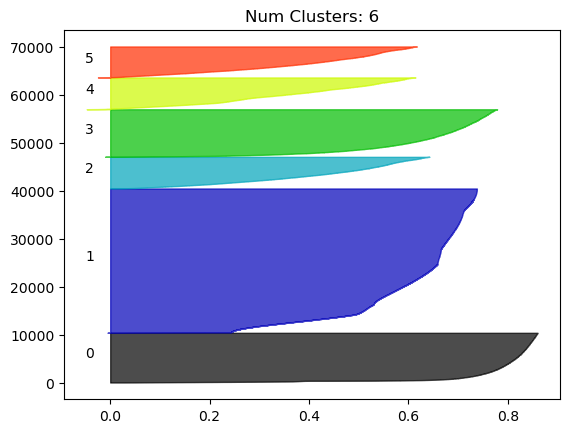

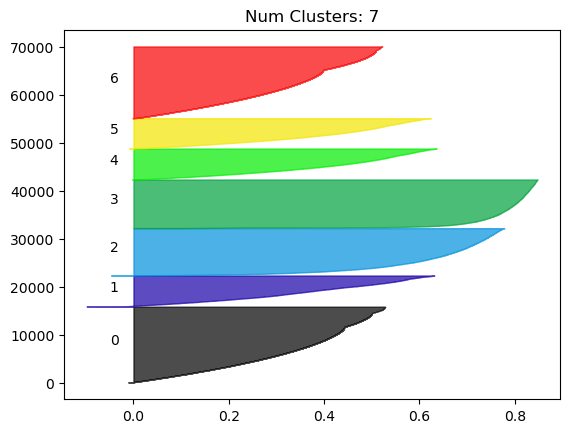

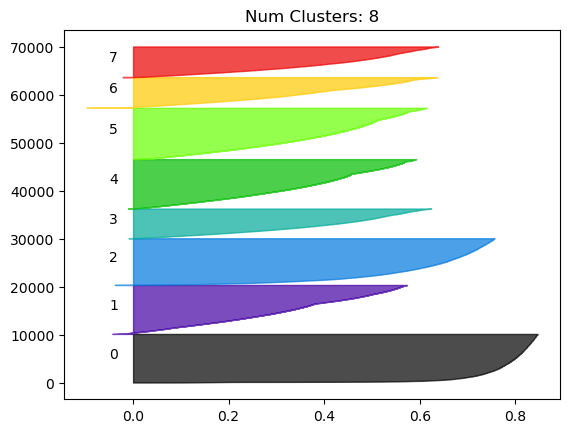

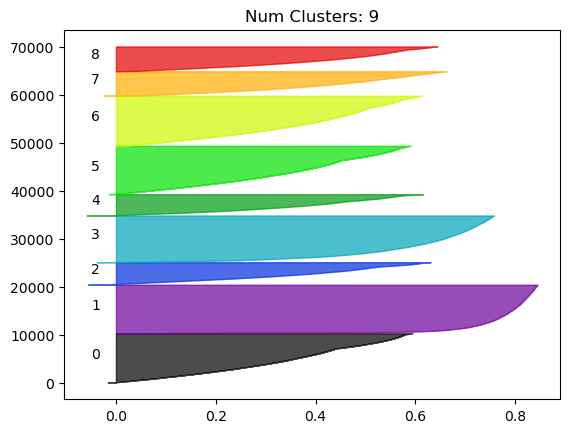

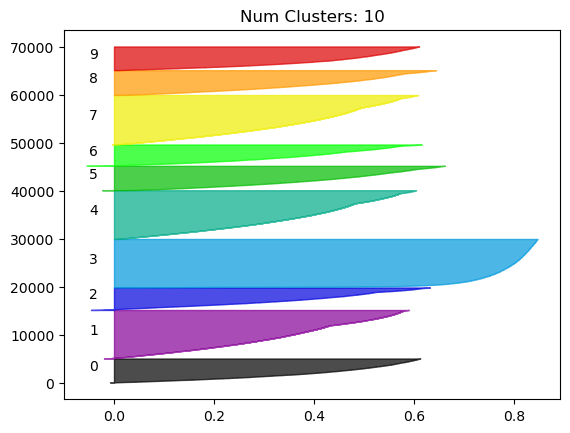

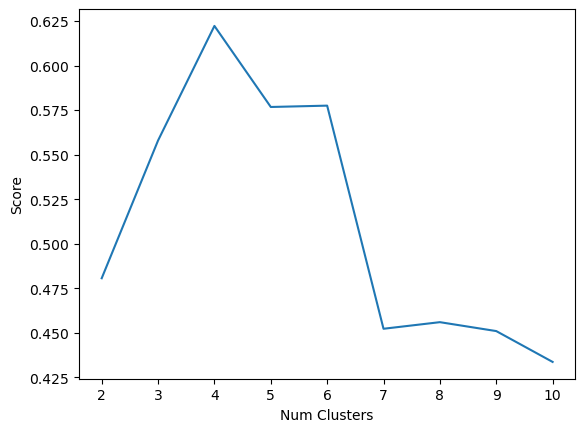

{'k': 4,
 'score': 0.6222555157633093,
 'labels': array([1, 1, 1, ..., 3, 3, 3], dtype=int32)}

In [55]:
num_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
kmeans_best_params, kmean_history = evaluate_kmeans_clustering(data_two, num_clusters=num_clusters, metric='silhouette')
kmeans_best_params

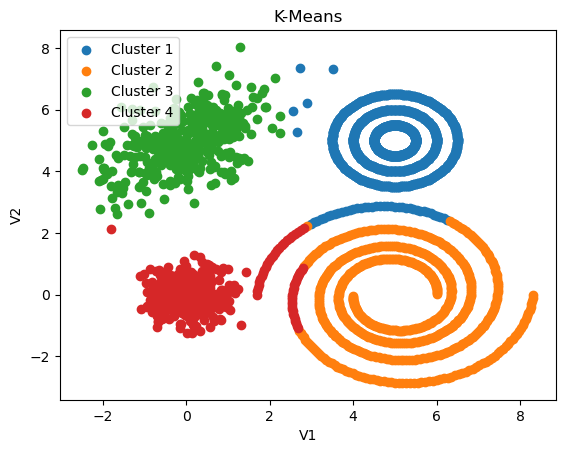

In [56]:
result_data_two = np.concatenate((data_two, kmeans_best_params['labels'].reshape(-1, 1)), axis=1)
plot_clusters(result_data_two, kmeans_best_params['k'], 'K-Means')

### Find Number of Clusters using Daives Bouldin metric

K: 2, Score: 0.95
K: 3, Score: 0.72
K: 4, Score: 0.52
K: 5, Score: 0.74
K: 6, Score: 0.65
K: 7, Score: 0.82
K: 8, Score: 0.76
K: 9, Score: 0.76
K: 10, Score: 0.79


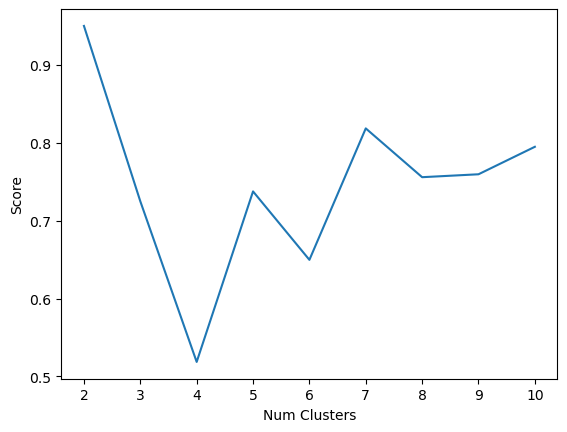

{'k': 4,
 'score': 0.5187100004611762,
 'labels': array([1, 1, 1, ..., 3, 3, 3], dtype=int32)}

In [57]:
num_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
kmeans_best_params, kmean_history = evaluate_kmeans_clustering(data_two, num_clusters=num_clusters, metric='davies_bouldin')
kmeans_best_params

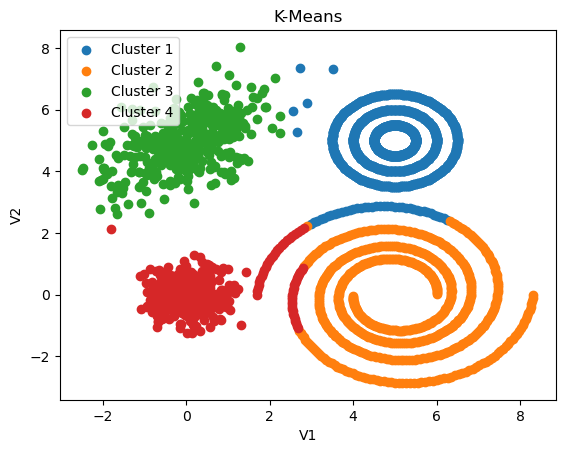

In [58]:
result_data_two = np.concatenate((data_two, kmeans_best_params['labels'].reshape(-1, 1)), axis=1)
plot_clusters(result_data_two, kmeans_best_params['k'], 'K-Means')